# **CoDoH : Classification of DNS over HTTPS**

1. EDM18B009 - C Siddarth
2. EDM18B041 - Navaas Roshan A
3. COE18B013 - D Balajee
4. COe18B007 - B Bavesh

## Import required libraries

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

from sklearn.metrics import classification_report

import torch

import warnings
warnings.filterwarnings("ignore")

## Load all dataframes

In [2]:
# Path to Non DoH csv
path1 = '/content/drive/MyDrive/DCN/l1-nondoh.csv'

# Path to Benign DoH csv
path2 = '/content/drive/MyDrive/DCN/l2-benign.csv'

# Path to Malicious DoH csv
path3 = '/content/drive/MyDrive/DCN/l2-malicious.csv'

In [3]:
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)

### Non-DoH dataframe

In [4]:
print('Non-DoH')
df1.head(2)

Non-DoH


,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,PacketLengthSkewFromMode,PacketLengthCoefficientofVariation,PacketTimeVariance,PacketTimeStandardDeviation,PacketTimeMean,PacketTimeMedian,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,72.21.91.42,192.168.20.191,443,51041,2020-01-14 15:49:01,4.544040,11256331,2.477164e+06,159324,35062.191354,427496.394703,653.832084,1106.811615,1514.0,1514,-1.868316,-0.622772,0.590735,1.720110,1.31153,2.257566,2.246046,0.136072,0.026351,1.617572,0.580949,1.107852e-07,0.000333,0.000027,0.000016,0.000014,0.096659,0.038228,12.454823,NonDoH
1,192.168.20.191,195.201.169.48,51043,443,2020-01-14 15:49:03,8.171041,930,1.138166e+02,11936,1460.768585,434289.817175,659.006690,677.157895,328.0,1514,1.589474,-1.269854,0.973195,7.408303,2.72182,1.559659,0.212176,0.212108,1.485200,0.495092,1.745138,3.224052e+00,1.795565,0.886579,0.103698,0.000900,1.308024,0.493259,2.025273,NonDoH


In [5]:
print('Columns with datatype as object')
print('------------------------------------------------------------------')
print(df1.select_dtypes('object').head())

print('\n\n Number of unique values from the above columns')
print('------------------------------------------------------------------')
def unique_vals(column):
    return len(df1[column].unique())

unique_elems = list(map(unique_vals, df1.select_dtypes('object').columns))

for i in range(len(unique_elems)):
    print(df1.select_dtypes('object').columns[i], '-', unique_elems[i])


Columns with datatype as object
------------------------------------------------------------------
         SourceIP   DestinationIP            TimeStamp   Label
0     72.21.91.42  192.168.20.191  2020-01-14 15:49:01  NonDoH
1  192.168.20.191  195.201.169.48  2020-01-14 15:49:03  NonDoH
2  192.168.20.191    96.17.115.57  2020-01-14 15:49:03  NonDoH
3  192.168.20.191   96.114.14.140  2020-01-14 15:49:03  NonDoH
4  192.168.20.191   23.78.199.198  2020-01-14 15:49:03  NonDoH


 Number of unique values from the above columns
------------------------------------------------------------------
SourceIP - 6755
DestinationIP - 33718
TimeStamp - 132811
Label - 1


**IP address** <br>
The IP address is split into 4 parts based upon the 'period' in them.
The first 3 parts corresponds to the Network ID, and the last part corresponds to the Host ID <br><br>
**Time stamp** <br>
The time stamps are broken down into Year, Month, Day, Hour, Minute, Second. <br>
The time stamp of the signals should not affect the signal's type. <br>

In [6]:
df1[['SourceIP' + str(i+1) for i in range(4)]] = [IPs.split('.') for IPs in df1.SourceIP]
df1[['DestinationIP' + str(i+1) for i in range(4)]] = [IPs.split('.') for IPs in df1.DestinationIP]

df1['TimeStamp'] = pd.to_datetime(df1['TimeStamp'], format = '%Y-%m-%d %H:%M:%S')

df1['Year'] = df1['TimeStamp'].dt.year
df1['Month'] = df1['TimeStamp'].dt.month
df1['Day'] = df1['TimeStamp'].dt.day
df1['Hour'] = df1['TimeStamp'].dt.hour
df1['Minute'] = df1['TimeStamp'].dt.minute
df1['Second'] = df1['TimeStamp'].dt.second

df1['Label'] = 0

df1 = df1.drop(['SourceIP', 'DestinationIP', 'TimeStamp'], axis = 1)

for cols in df1.columns:
    df1[cols] = df1[cols].astype('float64')


df1.head(3)

,SourcePort,DestinationPort,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,PacketLengthSkewFromMode,PacketLengthCoefficientofVariation,PacketTimeVariance,PacketTimeStandardDeviation,PacketTimeMean,PacketTimeMedian,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label,SourceIP1,SourceIP2,SourceIP3,SourceIP4,DestinationIP1,DestinationIP2,DestinationIP3,DestinationIP4,Year,Month,Day,Hour,Minute,Second
0,443.0,51041.0,4.544040,11256331.0,2.477164e+06,159324.0,35062.191354,427496.394703,653.832084,1106.811615,1514.0,1514.0,-1.868316,-0.622772,0.590735,1.720110,1.311530,2.257566,2.246046,0.136072,0.026351,1.617572,0.580949,1.107852e-07,0.000333,0.000027,0.000016,0.000014,0.096659,0.038228,12.454823,0.0,72.0,21.0,91.0,42.0,192.0,168.0,20.0,191.0,2020.0,1.0,14.0,15.0,49.0,1.0
1,51043.0,443.0,8.171041,930.0,1.138166e+02,11936.0,1460.768585,434289.817175,659.006690,677.157895,328.0,1514.0,1.589474,-1.269854,0.973195,7.408303,2.721820,1.559659,0.212176,0.212108,1.485200,0.495092,1.745138,3.224052e+00,1.795565,0.886579,0.103698,0.000900,1.308024,0.493259,2.025273,0.0,192.0,168.0,20.0,191.0,195.0,201.0,169.0,48.0,2020.0,1.0,14.0,15.0,49.0,3.0
2,51021.0,443.0,0.033776,162.0,4.796305e+03,138.0,4085.741355,86.400000,9.295160,60.000000,54.0,54.0,1.936492,0.645497,0.154919,0.000182,0.013489,0.026978,0.033684,0.000000,-1.491488,1.999993,0.500002,0.000000e+00,0.000000,0.033683,0.033683,0.033683,-10.000000,-10.000000,0.000000,0.0,192.0,168.0,20.0,191.0,96.0,17.0,115.0,57.0,2020.0,1.0,14.0,15.0,49.0,3.0


### DoH dataframe

In [7]:
df4 = pd.concat([df2, df3])
df4.head(2)

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,PacketLengthSkewFromMode,PacketLengthCoefficientofVariation,PacketTimeVariance,PacketTimeStandardDeviation,PacketTimeMean,PacketTimeMedian,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,192.168.20.191,176.103.130.131,50749,443,2020-01-14 15:49:11,95.081550,62311,655.342703,65358,687.388878,7474.676771,86.456213,135.673751,102.0,54,1.168467,0.944683,0.637236,670.585814,25.895672,45.065277,48.811292,1.495060,-0.433974,1.682529,0.574626,0.001053,0.032457,0.027624,0.026854,0.026822,0.071187,0.024715,1.174948,Benign
1,192.168.20.191,176.103.130.131,50749,443,2020-01-14 15:50:52,122.309318,93828,767.136973,101232,827.672018,10458.118598,102.264943,141.245474,114.0,54,0.799261,0.853132,0.724023,708.465878,26.617022,52.287903,48.830314,31.719656,0.389704,0.772748,0.509047,0.001170,0.034200,0.024387,0.021043,0.026981,0.293297,-0.075845,1.402382,Benign


In [8]:
print('Columns with datatype as object')
print('------------------------------------------------------------------')
print(df4.select_dtypes('object').head())

print('\n\n Number of unique values from the above columns')
print('------------------------------------------------------------------')
def unique_vals(column):
    return len(df4[column].unique())

unique_elems = list(map(unique_vals, df4.select_dtypes('object').columns))

for i in range(len(unique_elems)):
    print(df4.select_dtypes('object').columns[i], '-', unique_elems[i])


Columns with datatype as object
------------------------------------------------------------------
          SourceIP    DestinationIP            TimeStamp   Label
0   192.168.20.191  176.103.130.131  2020-01-14 15:49:11  Benign
1   192.168.20.191  176.103.130.131  2020-01-14 15:50:52  Benign
2   192.168.20.191  176.103.130.131  2020-01-14 15:52:55  Benign
3   192.168.20.191  176.103.130.131  2020-01-14 15:54:56  Benign
4  176.103.130.131   192.168.20.191  2020-01-14 15:56:46  Benign


 Number of unique values from the above columns
------------------------------------------------------------------
SourceIP - 21
DestinationIP - 21
TimeStamp - 144547
Label - 2


Similar pre-processing as above

In [9]:
df4[['SourceIP' + str(i+1) for i in range(4)]] = [IPs.split('.') for IPs in df4.SourceIP]
df4[['DestinationIP' + str(i+1) for i in range(4)]] = [IPs.split('.') for IPs in df4.DestinationIP]

df4['TimeStamp'] = pd.to_datetime(df4['TimeStamp'], format = '%Y-%m-%d %H:%M:%S')

df4['Year'] = df4['TimeStamp'].dt.year
df4['Month'] = df4['TimeStamp'].dt.month
df4['Day'] = df4['TimeStamp'].dt.day
df4['Hour'] = df4['TimeStamp'].dt.hour
df4['Minute'] = df4['TimeStamp'].dt.minute
df4['Second'] = df4['TimeStamp'].dt.second

df4['Label'] = (df4['Label'] == 'Malicious') * 1 

df4 = df4.drop(['SourceIP', 'DestinationIP', 'TimeStamp'], axis = 1)

for cols in df4.columns:
    df4[cols] = df4[cols].astype('float64')

df4.head(3)

,SourcePort,DestinationPort,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,PacketLengthSkewFromMode,PacketLengthCoefficientofVariation,PacketTimeVariance,PacketTimeStandardDeviation,PacketTimeMean,PacketTimeMedian,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label,SourceIP1,SourceIP2,SourceIP3,SourceIP4,DestinationIP1,DestinationIP2,DestinationIP3,DestinationIP4,Year,Month,Day,Hour,Minute,Second
0,50749.0,443.0,95.081550,62311.0,655.342703,65358.0,687.388878,7474.676771,86.456213,135.673751,102.0,54.0,1.168467,0.944683,0.637236,670.585814,25.895672,45.065277,48.811292,1.495060,-0.433974,1.682529,0.574626,0.001053,0.032457,0.027624,0.026854,0.026822,0.071187,0.024715,1.174948,0.0,192.0,168.0,20.0,191.0,176.0,103.0,130.0,131.0,2020.0,1.0,14.0,15.0,49.0,11.0
1,50749.0,443.0,122.309318,93828.0,767.136973,101232.0,827.672018,10458.118598,102.264943,141.245474,114.0,54.0,0.799261,0.853132,0.724023,708.465878,26.617022,52.287903,48.830314,31.719656,0.389704,0.772748,0.509047,0.001170,0.034200,0.024387,0.021043,0.026981,0.293297,-0.075845,1.402382,0.0,192.0,168.0,20.0,191.0,176.0,103.0,130.0,131.0,2020.0,1.0,14.0,15.0,50.0,52.0
2,50749.0,443.0,120.958413,38784.0,320.639127,38236.0,316.108645,7300.293933,85.441758,133.715278,89.0,54.0,1.570027,0.932978,0.638983,1358.911235,36.863413,50.316114,39.770747,0.417528,0.858198,1.353607,0.732636,0.000785,0.028021,0.029238,0.026921,0.026855,0.248064,0.085061,0.958348,0.0,192.0,168.0,20.0,191.0,176.0,103.0,130.0,131.0,2020.0,1.0,14.0,15.0,52.0,55.0


### Merging the dataframes

In [10]:
df5 = df4.copy()

df1['Label1'] = 0
df1['Label2'] = -1

df5['Label1'] = 1
df5['Label2'] = df4.Label

df_combined =  pd.concat([df1, df5])
df_combined = df_combined.drop(['Label'], axis = 1)

df_combined

,SourcePort,DestinationPort,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,PacketLengthSkewFromMode,PacketLengthCoefficientofVariation,PacketTimeVariance,PacketTimeStandardDeviation,PacketTimeMean,PacketTimeMedian,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,SourceIP1,SourceIP2,SourceIP3,SourceIP4,DestinationIP1,DestinationIP2,DestinationIP3,DestinationIP4,Year,Month,Day,Hour,Minute,Second,Label1,Label2
0,443.0,51041.0,4.544040,11256331.0,2.477164e+06,159324.0,35062.191354,427496.394703,653.832084,1106.811615,1514.0,1514.0,-1.868316,-0.622772,0.590735,1.720110,1.311530,2.257566,2.246046,0.136072,0.026351,1.617572,0.580949,1.107852e-07,0.000333,0.000027,0.000016,0.000014,0.096659,0.038228,12.454823,72.0,21.0,91.0,42.0,192.0,168.0,20.0,191.0,2020.0,1.0,14.0,15.0,49.0,1.0,0,-1.0
1,51043.0,443.0,8.171041,930.0,1.138166e+02,11936.0,1460.768585,434289.817175,659.006690,677.157895,328.0,1514.0,1.589474,-1.269854,0.973195,7.408303,2.721820,1.559659,0.212176,0.212108,1.485200,0.495092,1.745138,3.224052e+00,1.795565,0.886579,0.103698,0.000900,1.308024,0.493259,2.025273,192.0,168.0,20.0,191.0,195.0,201.0,169.0,48.0,2020.0,1.0,14.0,15.0,49.0,3.0,0,-1.0
2,51021.0,443.0,0.033776,162.0,4.796305e+03,138.0,4085.741355,86.400000,9.295160,60.000000,54.0,54.0,1.936492,0.645497,0.154919,0.000182,0.013489,0.026978,0.033684,0.000000,-1.491488,1.999993,0.500002,0.000000e+00,0.000000,0.033683,0.033683,0.033683,-10.000000,-10.000000,0.000000,192.0,168.0,20.0,191.0,96.0,17.0,115.0,57.0,2020.0,1.0,14.0,15.0,49.0,3.0,0,-1.0
3,50308.0,443.0,0.060723,108.0,1.778568e+03,120.0,1976.186947,9.000000,3.000000,57.000000,57.0,54.0,0.000000,1.000000,0.052632,0.000691,0.026284,0.045525,0.060687,0.000000,-1.730700,1.732051,0.577350,0.000000e+00,0.000000,0.060687,0.060687,0.060687,-10.000000,-10.000000,0.000000,192.0,168.0,20.0,191.0,96.0,114.0,14.0,140.0,2020.0,1.0,14.0,15.0,49.0,3.0,0,-1.0
4,50983.0,443.0,0.019545,55.0,2.814019e+03,66.0,3376.822717,30.250000,5.500000,60.500000,60.5,55.0,0.000000,1.000000,0.090909,0.000096,0.009772,0.009772,0.009772,0.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000,0.019545,0.019545,0.019545,-10.000000,-10.000000,0.000000,192.0,168.0,20.0,191.0,23.0,78.0,199.0,198.0,2020.0,1.0,14.0,15.0,49.0,3.0,0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249831,443.0,33926.0,120.653838,78776.0,6.529092e+02,46073.0,381.861040,7979.982650,89.330749,121.566699,87.0,87.0,1.160856,0.386952,0.734829,1199.921257,34.639880,56.371141,55.775982,0.000000,0.051544,1.627348,0.614497,8.716113e-09,0.000093,0.000054,0.000037,0.000028,0.538614,0.275939,1.736555,1.0,1.0,1.0,1.0,192.0,168.0,20.0,207.0,2020.0,4.0,1.0,0.0,46.0,31.0,1,1.0
249832,443.0,33926.0,120.718680,78719.0,6.520863e+02,46047.0,381.440553,8141.129962,90.228210,121.604288,87.0,87.0,1.150559,0.383520,0.741982,1213.045827,34.828807,56.544629,55.779799,0.000000,0.065879,1.623502,0.615953,8.737216e-07,0.000935,0.000110,0.000032,0.000024,0.250408,0.092028,8.495895,1.0,1.0,1.0,1.0,192.0,168.0,20.0,207.0,2020.0,4.0,1.0,0.0,48.0,32.0,1,1.0
249833,443.0,33926.0,120.645723,78808.0,6.532183e+02,46118.0,382.259718,8648.833760,92.999106,122.476471,87.0,87.0,1.144413,0.381471,0.759322,1247.963251,35.326523,54.657933,55.694161,0.000000,-0.087999,1.547221,0.646320,1.558392e-06,0.001248,0.000128,0.000035,0.000025,0.222679,0.082237,9.778681,1.0,1.0,1.0,1.0,192.0,168.0,20.0,207.0,2020.0,4.0,1.0,0.0,50.0,33.0,1,1.0
249834,443.0,33926.0,120.

## Feature Engineering

In [11]:
df_proc = df_combined.drop([col for col in df_combined.columns[df_combined.isnull().sum() != 0]], axis = 1)

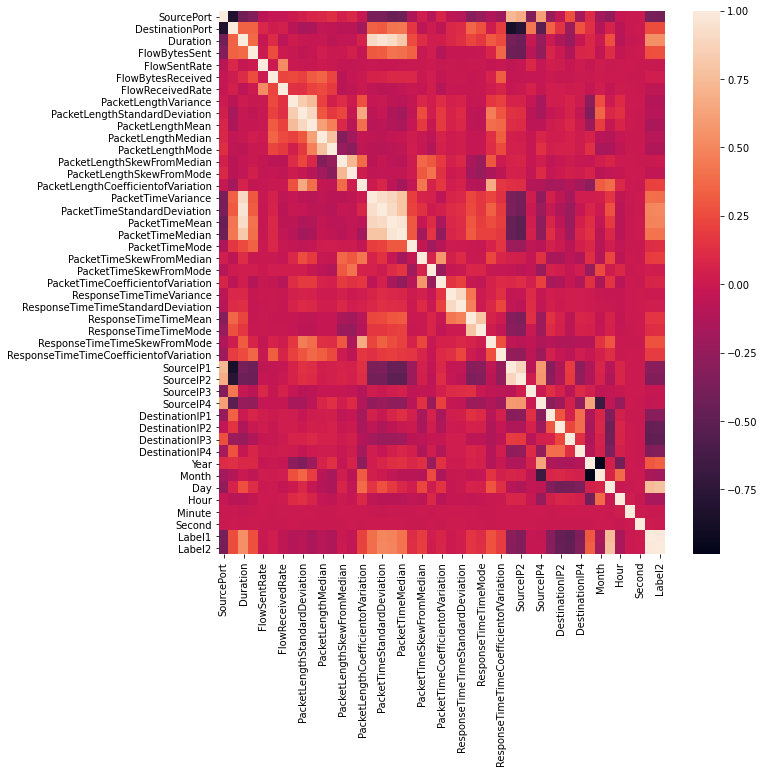

In [12]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(df_proc.corr())

In [13]:
df_proc.corr().Label1.sort_values(ascending = False)[:10]

Label1                          1.000000
Label2                          0.988286
Day                             0.751553
Duration                        0.534891
PacketTimeStandardDeviation     0.501824
PacketTimeMean                  0.485498
PacketTimeMedian                0.412639
PacketTimeVariance              0.396327
Year                            0.303794
ResponseTimeTimeSkewFromMode    0.281496
Name: Label1, dtype: float64

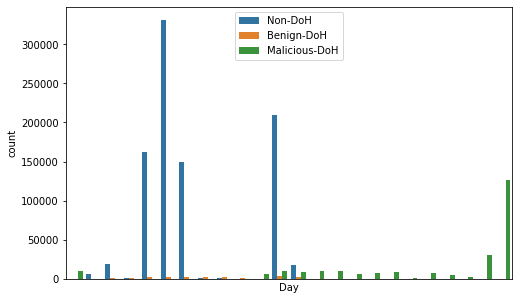

In [14]:
fig = plt.figure(figsize=(8, 5))
sns.countplot(df_proc.Day, hue = df_proc.Label2)
plt.xticks([])
plt.legend(['Non-DoH', 'Benign-DoH', 'Malicious-DoH'])

From the above histogram, it is inferrable that the majority of the Non-DoH samples were recorded in the first half of the month(s). Where as the DoH samples were recorded in the second half of the month(s). <br>
Even though a strong relation between time stamp and the target variable is found, this relation is erroneous, as a packet request type does not depend on it's timestamp. <br> <br>
Hence the features corresponding to timestamps are to be dropped.

In [15]:
df_proc = df_proc.drop(['Second', 'Minute', 'Hour', 'Day', 'Month', 'Year'], axis = 1)

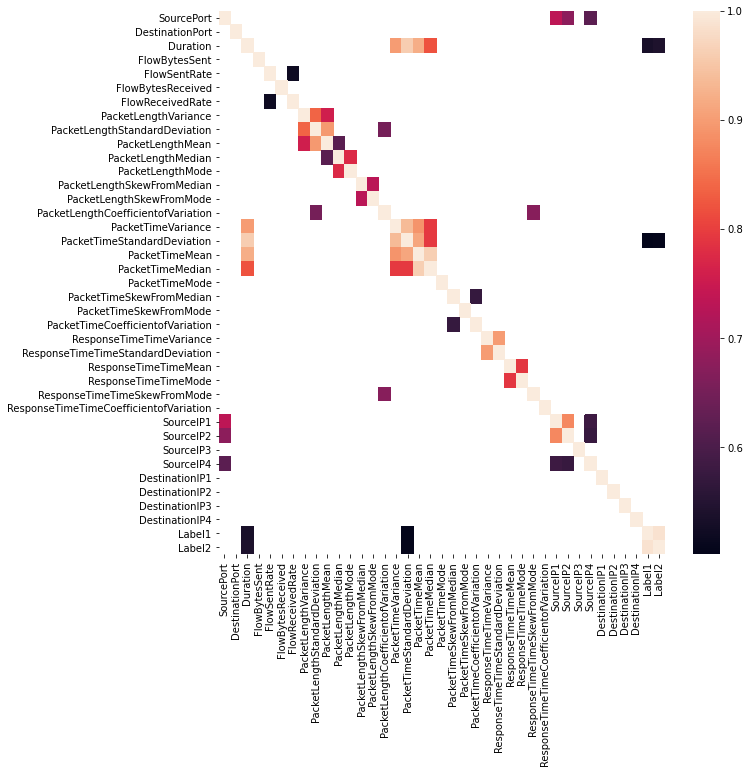

In [16]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(df_proc.corr()[df_proc.corr()>0.5])

There are multiple derivative features of packet length and packet time, and are highly correlated with each other. It is important to remove the highly correlated variables due to the following 2 reasons: <br>
1. The loss function becomes ellipsoidal, causing zig-zag and late convergence
2. Requires more computational power 

In [17]:
df_proc.columns

Index(['SourcePort', 'DestinationPort', 'Duration', 'FlowBytesSent',
       'FlowSentRate', 'FlowBytesReceived', 'FlowReceivedRate',
       'PacketLengthVariance', 'PacketLengthStandardDeviation',
       'PacketLengthMean', 'PacketLengthMedian', 'PacketLengthMode',
       'PacketLengthSkewFromMedian', 'PacketLengthSkewFromMode',
       'PacketLengthCoefficientofVariation', 'PacketTimeVariance',
       'PacketTimeStandardDeviation', 'PacketTimeMean', 'PacketTimeMedian',
       'PacketTimeMode', 'PacketTimeSkewFromMedian', 'PacketTimeSkewFromMode',
       'PacketTimeCoefficientofVariation', 'ResponseTimeTimeVariance',
       'ResponseTimeTimeStandardDeviation', 'ResponseTimeTimeMean',
       'ResponseTimeTimeMode', 'ResponseTimeTimeSkewFromMode',
       'ResponseTimeTimeCoefficientofVariation', 'SourceIP1', 'SourceIP2',
       'SourceIP3', 'SourceIP4', 'DestinationIP1', 'DestinationIP2',
       'DestinationIP3', 'DestinationIP4', 'Label1', 'Label2'],
      dtype='object')

In [18]:
df_proc.corr().Duration.sort_values(ascending = False)[:7]

Duration                       1.000000
PacketTimeStandardDeviation    0.959333
PacketTimeMean                 0.922139
PacketTimeVariance             0.900179
PacketTimeMedian               0.819352
Label2                         0.541339
Label1                         0.534891
Name: Duration, dtype: float64

In [19]:
df_proc.corr().PacketLengthMean.sort_values(ascending = False)[:7]

PacketLengthMean                      1.000000
PacketLengthStandardDeviation         0.896087
PacketLengthVariance                  0.757116
PacketLengthMedian                    0.617715
PacketLengthMode                      0.469033
PacketLengthCoefficientofVariation    0.401105
ResponseTimeTimeSkewFromMode          0.390470
Name: PacketLengthMean, dtype: float64

In [20]:
# The correlated variables are dropped

df_proc = df_proc.drop(['PacketTimeStandardDeviation', 'PacketTimeMean', 'PacketTimeVariance', 'PacketTimeMedian', 
                        'PacketLengthStandardDeviation', 'PacketLengthVariance', 'PacketLengthMedian',
                        'ResponseTimeTimeStandardDeviation', 'ResponseTimeTimeMode', 'PacketLengthSkewFromMedian'], axis = 1)

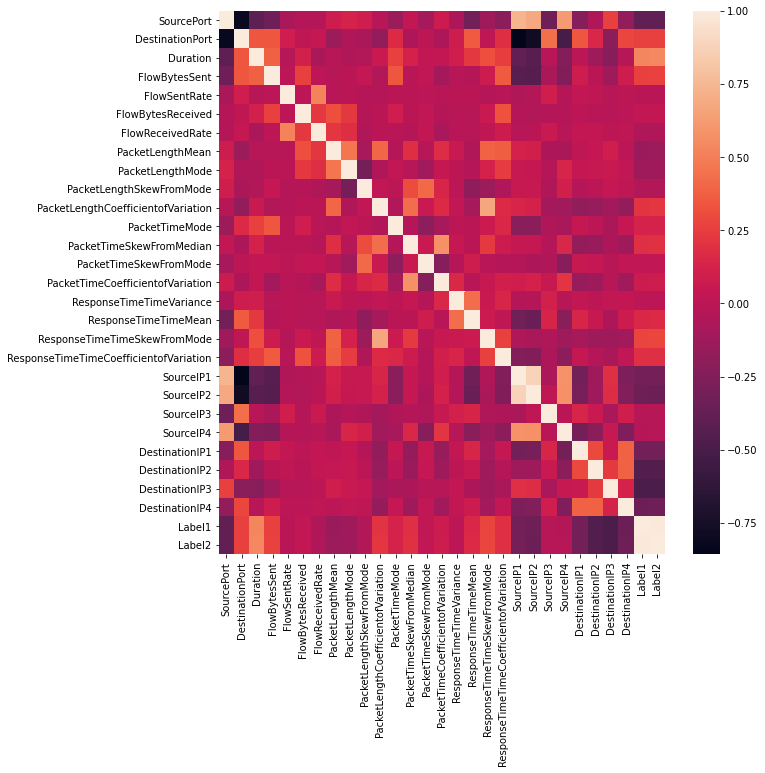

In [21]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(df_proc.corr())

Even though SourceIP1 and SourceIP2 have high correlatation, they are independent of each other

In [22]:
print('Columns of the dataframe')
print('------------------------------------------------------------------')
print(df_proc.columns)

Columns of the dataframe
------------------------------------------------------------------
Index(['SourcePort', 'DestinationPort', 'Duration', 'FlowBytesSent',
       'FlowSentRate', 'FlowBytesReceived', 'FlowReceivedRate',
       'PacketLengthMean', 'PacketLengthMode', 'PacketLengthSkewFromMode',
       'PacketLengthCoefficientofVariation', 'PacketTimeMode',
       'PacketTimeSkewFromMedian', 'PacketTimeSkewFromMode',
       'PacketTimeCoefficientofVariation', 'ResponseTimeTimeVariance',
       'ResponseTimeTimeMean', 'ResponseTimeTimeSkewFromMode',
       'ResponseTimeTimeCoefficientofVariation', 'SourceIP1', 'SourceIP2',
       'SourceIP3', 'SourceIP4', 'DestinationIP1', 'DestinationIP2',
       'DestinationIP3', 'DestinationIP4', 'Label1', 'Label2'],
      dtype='object')


In [23]:
task1x = df_proc.drop(['Label1', 'Label2'], axis = 1)
task1y = df_proc['Label1']

task2 = df_proc.loc[df_proc.Label2 != -1]
task2x = task2.drop(['Label1', 'Label2'], axis = 1)
task2y = task2['Label2']

In [24]:
shuffled1 = torch.randperm(len(task1x))

# 90 % training data
# 10 % validation data

train_ind1 = shuffled1[:-len(shuffled1)//10]
valid_ind1 = shuffled1[-len(shuffled1)//10:]

shuffled2 = torch.randperm(len(task2))
train_ind2 = shuffled2[:-len(shuffled2)//10]
valid_ind2 = shuffled2[-len(shuffled2)//10:]

In [25]:
tx1 = torch.tensor(task1x.values.astype(np.float32))[train_ind1]
ty1 = torch.tensor(task1y.values.astype(np.float32))[train_ind1].reshape((len(train_ind1), 1))
vx1 = torch.tensor(task1x.values.astype(np.float32))[valid_ind1]
vy1 = torch.tensor(task1y.values.astype(np.float32))[valid_ind1].reshape((len(valid_ind1), 1))

tx2 = torch.tensor(task2x.values.astype(np.float32))[train_ind2]
ty2 = torch.tensor(task2y.values.astype(np.float32))[train_ind2].reshape((len(train_ind2), 1))
vx2 = torch.tensor(task2x.values.astype(np.float32))[valid_ind2]
vy2 = torch.tensor(task2y.values.astype(np.float32))[valid_ind2].reshape((len(valid_ind2), 1))

In [26]:
print('Dataset 1')
print('Train X Shape:', tx1.shape, '; Valid X shape:', vx1.shape)
print('Train Y Shape:', ty1.shape, '; Valid Y shape:', vy1.shape)

print('\nDataset 2')
print('Train X Shape:', tx2.shape, '; Valid X shape:', vx2.shape)
print('Train Y Shape:', ty2.shape, '; Valid Y shape:', vy2.shape)


Dataset 1
Train X Shape: torch.Size([1050422, 27]) ; Valid X shape: torch.Size([116714, 27])
Train Y Shape: torch.Size([1050422, 1]) ; Valid Y shape: torch.Size([116714, 1])

Dataset 2
Train X Shape: torch.Size([242678, 27]) ; Valid X shape: torch.Size([26965, 27])
Train Y Shape: torch.Size([242678, 1]) ; Valid Y shape: torch.Size([26965, 1])


## Task 1

In [27]:
Logistic_Reg_Task1 = make_pipeline(StandardScaler(), LogisticRegression())
Logistic_Reg_Task1.fit(tx1, ty1)

pred = Logistic_Reg_Task1.predict(vx1)
print(classification_report(vy1, pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     89535
         1.0       0.95      0.95      0.95     27179

    accuracy                           0.98    116714
   macro avg       0.97      0.97      0.97    116714
weighted avg       0.98      0.98      0.98    116714



In [28]:
importance = Logistic_Reg_Task1[1].coef_[0]
feat_imp = {}

for i,v in zip(df_proc.drop(['Label1', 'Label2'], axis = 1).columns, importance):
    feat_imp[i] = v
    print(i, ':', np.round(v, 3))

SourcePort : -1.426
DestinationPort : -0.549
Duration : 1.643
FlowBytesSent : 1.185
FlowSentRate : 0.021
FlowBytesReceived : -2.232
FlowReceivedRate : 0.03
PacketLengthMean : -1.948
PacketLengthMode : -1.373
PacketLengthSkewFromMode : -0.257
PacketLengthCoefficientofVariation : 0.741
PacketTimeMode : -0.201
PacketTimeSkewFromMedian : 0.173
PacketTimeSkewFromMode : 0.379
PacketTimeCoefficientofVariation : -0.335
ResponseTimeTimeVariance : -0.372
ResponseTimeTimeMean : 0.34
ResponseTimeTimeSkewFromMode : 0.19
ResponseTimeTimeCoefficientofVariation : 1.772
SourceIP1 : -0.084
SourceIP2 : -1.552
SourceIP3 : -0.249
SourceIP4 : 1.175
DestinationIP1 : -0.733
DestinationIP2 : -1.941
DestinationIP3 : -1.655
DestinationIP4 : -1.191


In [29]:
sorted_feat = sorted(feat_imp.items(), key=lambda x:x[1])

class0_imp = sorted_feat[:5]
class1_imp = sorted_feat[-5:]

Text(0.5, 0, 'Importance')

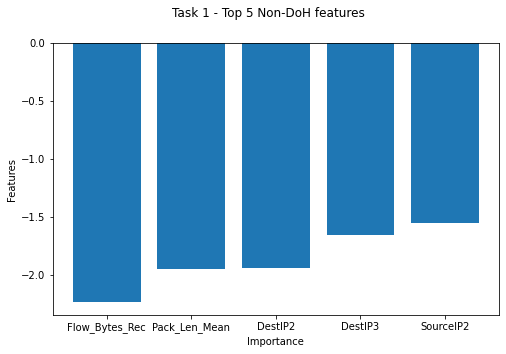

In [30]:
fig1 = plt.figure(figsize=(8, 5))
ax = fig1.add_subplot(111)

ax.bar([i[0] for i in class0_imp], [i[1] for i in class0_imp])
fig1.suptitle('Task 1 - Top 5 Non-DoH features')
ax.set_xticklabels(['Flow_Bytes_Rec', 'Pack_Len_Mean', 'DestIP2', 'DestIP3', 'SourceIP2'])
ax.set_ylabel('Features')
ax.set_xlabel('Importance')


The traffic generated by accessing a website that uses HTTPS protocol is captured and labeled as non-DoH traffic. These are TTPS requests done in port 443, unlike DNS requests HTTPS requests vary depending on the user, hence it depends more on the FlowBytesRecieved and PacketLength. 


Text(0.5, 0, 'Importance')

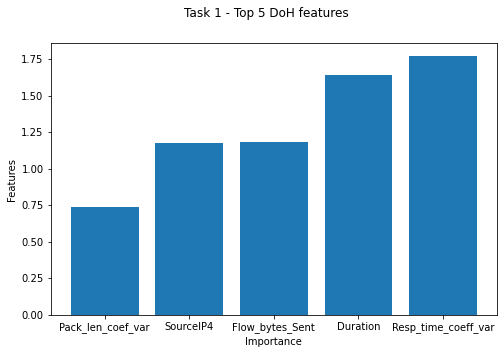

In [31]:
fig1 = plt.figure(figsize=(8, 5))
ax = fig1.add_subplot(111)

ax.bar([i[0] for i in class1_imp], [i[1] for i in class1_imp])
fig1.suptitle('Task 1 - Top 5 DoH features')
ax.set_xticklabels(['Pack_len_coef_var', 'SourceIP4', 'Flow_bytes_Sent', 'Duration', 'Resp_time_coeff_var'])
ax.set_ylabel('Features')
ax.set_xlabel('Importance')


The influence of the response time coefficient is justified as DoH operates over TCP, which can re-transmit data very quickly in the case of packet losses, whereas traditional DNS clients use UDP and wait for a fixed time before retrying. So in lossy networks, DoH may outperform UDP-based DNS. Hence the dependency is more on the RTCV and duration. Added to this the lesser number of DoH servers may also contribute to a longer delay when compared to Non-DoH requests, which have a comparatively higher number of servers.

## Task 2

In [32]:
Logistic_Reg_Task2 = make_pipeline(StandardScaler(), LogisticRegression())
Logistic_Reg_Task2.fit(tx2, ty2)

pred = Logistic_Reg_Task2.predict(vx2)
print(classification_report(vy2, pred))

              precision    recall  f1-score   support

         0.0       0.94      0.77      0.85      2029
         1.0       0.98      1.00      0.99     24936

    accuracy                           0.98     26965
   macro avg       0.96      0.88      0.92     26965
weighted avg       0.98      0.98      0.98     26965



In [33]:
importance = Logistic_Reg_Task2[1].coef_[0]
feat_imp = {}

for i,v in zip(df_proc.drop(['Label1', 'Label2'], axis = 1).columns, importance):
    feat_imp[i] = v
    print(i, ':', np.round(v, 3))

SourcePort : -1.377
DestinationPort : -11.112
Duration : 1.011
FlowBytesSent : -0.964
FlowSentRate : 0.636
FlowBytesReceived : 1.229
FlowReceivedRate : -2.746
PacketLengthMean : 0.745
PacketLengthMode : -0.256
PacketLengthSkewFromMode : -0.414
PacketLengthCoefficientofVariation : 0.941
PacketTimeMode : -0.711
PacketTimeSkewFromMedian : 0.034
PacketTimeSkewFromMode : -0.075
PacketTimeCoefficientofVariation : -0.566
ResponseTimeTimeVariance : -1.237
ResponseTimeTimeMean : 5.041
ResponseTimeTimeSkewFromMode : 0.128
ResponseTimeTimeCoefficientofVariation : -0.19
SourceIP1 : 5.104
SourceIP2 : 5.324
SourceIP3 : -4.341
SourceIP4 : 4.234
DestinationIP1 : 14.206
DestinationIP2 : -2.455
DestinationIP3 : -14.597
DestinationIP4 : 19.505


In [34]:
sorted_feat = sorted(feat_imp.items(), key=lambda x:x[1])

class0_imp = sorted_feat[:5]
class1_imp = sorted_feat[-5:]

Text(0.5, 0, 'Importance')

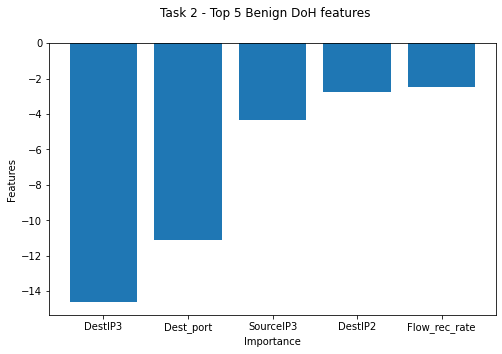

In [35]:
fig1 = plt.figure(figsize=(8, 5))
ax = fig1.add_subplot(111)

ax.bar([i[0] for i in class0_imp], [i[1] for i in class0_imp])
fig1.suptitle('Task 2 - Top 5 Benign DoH features')
ax.set_xticklabels(['DestIP3', 'Dest_port', 'SourceIP3', 'DestIP2', 'Flow_rec_rate'])
ax.set_ylabel('Features')
ax.set_xlabel('Importance')


As DoH operates only on port 443 (same as HTTPS), and only a limited number of servers support DoH (like google, Cloudflare, Quad9), hence the dependency on the destination port is justified.

Text(0.5, 0, 'Importance')

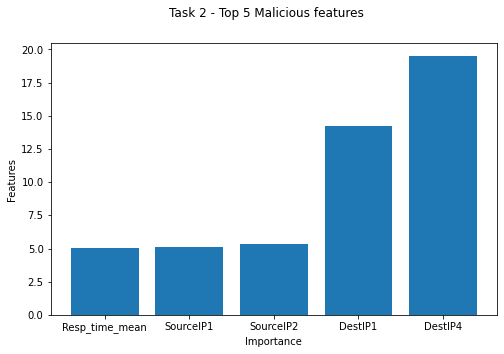

In [36]:
fig1 = plt.figure(figsize=(8, 5))
ax = fig1.add_subplot(111)

ax.bar([i[0] for i in class1_imp], [i[1] for i in class1_imp])
fig1.suptitle('Task 2 - Top 5 Malicious features')
ax.set_xticklabels(['Resp_time_mean', 'SourceIP1', 'SourceIP2', 'DestIP1', 'DestIP4'])
ax.set_ylabel('Features')
ax.set_xlabel('Importance')


The DestinationIP4 of Malicious requests is predominantly ‘11’, whereas the very few requests of benign DoH requests are made from ‘11’